# World Teams Results Project

In [1]:
#importing the necessary librries for the project
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('results.csv',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46442 non-null  object
 1   home_team   46442 non-null  object
 2   away_team   46442 non-null  object
 3   home_score  46442 non-null  int64 
 4   away_score  46442 non-null  int64 
 5   tournament  46442 non-null  object
 6   city        46442 non-null  object
 7   country     46442 non-null  object
 8   neutral     46442 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46442 non-null  object
 1   home_team   46442 non-null  object
 2   away_team   46442 non-null  object
 3   home_score  46442 non-null  int64 
 4   away_score  46442 non-null  int64 
 5   tournament  46442 non-null  object
 6   city        46442 non-null  object
 7   country     46442 non-null  object
 8   neutral     46442 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [3]:
df.tail()
df.tournament.value_counts().head(10)

Friendly                                17906
FIFA World Cup qualification             8052
UEFA Euro qualification                  2824
African Cup of Nations qualification     2116
FIFA World Cup                            964
Copa América                              841
African Cup of Nations                    793
AFC Asian Cup qualification               764
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

In [4]:
confederation_tournaments=['AFC Asian Cup','African Cup of Nations','UEFA Euro','Copa América','CONCACAF Championship','Oceania Nations Cup']
confederation_clasification=['UEFA Euro qualification','African Cup of Nations qualification','FC Asian Cup qualification','UEFA Nations League']
def k_value(tournament):
    k=5
    if tournament == 'Friendly':
        k=10
    elif tournament in confederation_clasification:
        k=20
    elif tournament == 'FIFA World Cup qualification':
        k=25
    elif tournament in confederation_tournaments:
        k=40
    elif tournament == 'FIFA World Cup':
        k=50
    return k

def expected_result(loc,aw):
    dr=loc-aw
    we=(1/(10**(-dr/400)+1))
    return [np.round(we,3),1-np.round(we,3)]

def actual_result(loc,aw):
    if loc<aw:
        wa=1
        wl=0
    elif loc>aw:
        wa=0
        wl=1
    elif loc==aw:
        wa=0.5
        wl=0.5
    return [wl,wa]

def calculate_elo(elo_l,elo_v,local_goals,away_goals,tournament):

    k=k_value(tournament)
    wl,wv=actual_result(local_goals,away_goals)
    wel,wev=expected_result(elo_l,elo_v)

    elo_ln=elo_l+k*(wl-wel)
    elo_vn=elo_v+k*(wv-wev)

    return elo_ln,elo_vn,wel,wev

# ELO RANKING

In [5]:
current_elo={}
for idx,row in df.iterrows():

    local=row['home_team']
    away=row['away_team']
    local_goals=row['home_score']
    away_goals=row['away_score']
    tournament = row['tournament']


    if local not in current_elo.keys():
        current_elo[local]=1300

    if away not in current_elo.keys():
        current_elo[away]=1300

    elo_l=current_elo[local]
    elo_v=current_elo[away]
    elo_ln,elo_vn, wel, wev=calculate_elo(elo_l,elo_v,local_goals,away_goals,tournament)

    current_elo[local]=elo_ln
    current_elo[away]=elo_vn

    df.loc[idx,'Elo_h_after']=elo_ln
    df.loc[idx,'Elo_a_after']=elo_vn
    df.loc[idx,'Elo_h_before']=elo_l
    df.loc[idx,'Elo_a_before']=elo_v
    df.loc[idx,'probH']=wel
    df.loc[idx,'probA']=wev

In [6]:
elos=df[['date','home_team','Elo_h_after']].rename(columns={'home_team':'Team','Elo_h_after':'Elo'}).append(df[['date','away_team','Elo_a_after']].rename(columns={'away_team':'Team','Elo_a_after':'Elo'}))
elos.sort_values(by='date', ascending=False,inplace=True)
elos.drop_duplicates('Team',inplace=True)
elos.sort_values(by='Elo', ascending=False, inplace=True)
elos.reset_index(drop=True, inplace=True)
elos['position']=elos.index+1

In [7]:
elos.head(10)

,date,Team,Elo,position
0,2024-03-26,Argentina,1768.715,1
1,2024-03-26,France,1755.555,2
2,2024-03-26,Brazil,1704.245,3
3,2024-03-26,England,1687.990,4
4,2024-03-26,Netherlands,1679.865,5
5,2024-03-26,Belgium,1678.900,6
6,2024-03-26,Spain,1671.700,7
7,2024-03-24,Italy,1659.605,8
8,2024-03-26,Portugal,1652.335,9
9,2024-03-26,Colombia,1644.175,10


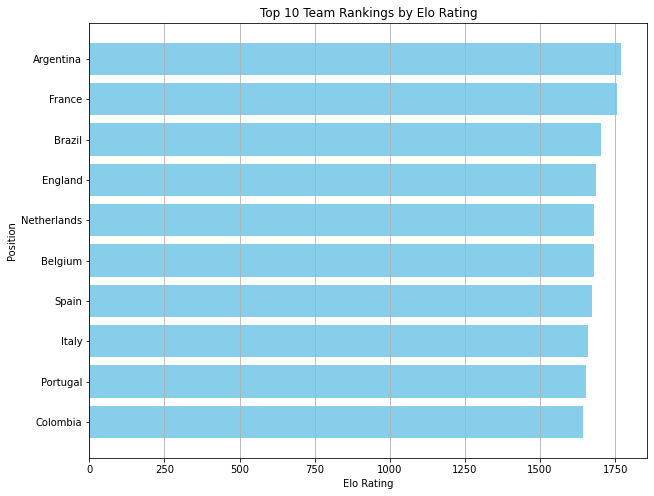

In [8]:
import matplotlib.pyplot as plt

# Assuming 'elos' DataFrame contains the latest rankings
# Sort elos DataFrame by Elo rating in descending order
elos.sort_values(by='Elo', ascending=False, inplace=True)

# Select only the top 10 teams
top_10_teams = elos.head(10)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(1, len(top_10_teams) + 1), top_10_teams['Elo'], color='skyblue')
plt.xlabel('Elo Rating')
plt.ylabel('Position')
plt.title('Top 10 Team Rankings by Elo Rating')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest Elo at the top
plt.yticks(range(1, len(top_10_teams) + 1), top_10_teams['Team'])
plt.grid(axis='x')
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(15, 16))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='population', ascending=True).tail(20)
    ax.clear()
    ax.barh(dff['province'], dff['population'], color=[colors[group_lk[x]] for x in dff['province']])
    dx = dff['population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['population'], dff['province'])):
        ax.text(value-dx, i,     name,           size=14, weight=800, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous provinces in Turkey from 2007 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Can Iban', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

In [10]:
eurocup_teams =[
    "Albania", "Scotland", "Hungary", "Romania",
    "Germany", "Slovakia", "England", "Czech Republic",
    "Austria", "Slovenia", "Italy", "Serbia",
    "Belgium", "Spain", "Netherlands", "Switzerland",
    "Croatia", "France", "Poland", "Turkey",
    "Denmark", "Georgia", "Portugal", "Ukraine"
]

elos_ranking_euro = elos[elos.Team.isin(eurocup_teams)]
print(elos_ranking_euro)

          date            Team       Elo  position
1   2024-03-26          France  1755.555         2
3   2024-03-26         England  1687.990         4
4   2024-03-26     Netherlands  1679.865         5
5   2024-03-26         Belgium  1678.900         6
6   2024-03-26           Spain  1671.700         7
7   2024-03-24           Italy  1659.605         8
8   2024-03-26        Portugal  1652.335         9
11  2024-03-26         Germany  1626.170        12
12  2024-03-26         Croatia  1621.360        13
17  2024-03-26     Switzerland  1553.605        18
23  2024-03-26         Denmark  1538.630        24
24  2024-03-26         Ukraine  1529.785        25
27  2024-03-26         Hungary  1509.885        28
29  2024-03-26         Austria  1497.245        30
30  2024-03-25          Serbia  1494.740        31
35  2024-03-26          Poland  1484.535        36
39  2024-03-26  Czech Republic  1478.120        40
44  2024-03-26        Scotland  1469.525        45
45  2024-03-26          Turkey 

In [11]:
AmericanCup_teams = [
    "Argentina", "Chile", "United States", "Paraguay",
    "Bolivia", "Colombia", "Jamaica", "Peru",
    "Brazil", "Costa Rica", "Mexico", "Uruguay",
    "Canada", "Ecuador", "Panama", "Venezuela"
]

elos_ranking_america = elos[elos.Team.isin(AmericanCup_teams)]
print(elos_ranking_america)

           date           Team       Elo  position
0    2024-03-26      Argentina  1768.715         1
2    2024-03-26         Brazil  1704.245         3
9    2024-03-26       Colombia  1644.175        10
10   2024-03-26        Uruguay  1631.220        11
16   2024-03-24         Mexico  1562.070        17
18   2024-03-24  United States  1551.160        19
20   2024-03-24        Ecuador  1547.025        21
31   2024-03-26           Peru  1493.535        32
38   2024-03-26     Costa Rica  1478.505        39
42   2024-03-26          Chile  1472.190        43
51   2024-03-24      Venezuela  1448.230        52
54   2024-03-23         Canada  1437.035        55
55   2023-11-21       Paraguay  1435.675        56
57   2024-03-24         Panama  1428.655        58
99   2024-03-24        Jamaica  1325.740       100
111  2024-03-25        Bolivia  1310.650       112


maybe put the top 10 teams over years

# Elo ranking for the attacking power and the deffensive power

In [12]:
def calculate_attdef(Attack_l,Attack_v,Deffend_l,Deffend_v,localGoals,awayGoals, tournament,neutral):
    k=k_value(tournament)
    if neutral==False:
        c=1.27
    else:
        c=1
    ehg=Attack_l*Deffend_v*c
    eag=Attack_v*Deffend_l/c
    Attack_ln=Attack_l+(k/2000)*(localGoals-ehg)
    Attack_vn=Attack_v+(k/2000)*(awayGoals-eag)
    Deffend_ln=Deffend_l+(k/2000)*(awayGoals-eag)
    Deffend_vn=Deffend_v+(k/2000)*(localGoals-ehg)
  
    return Attack_ln,Attack_vn,Deffend_ln,Deffend_vn, ehg, eag

In [13]:
current_att={}
current_def={}
for idx,row in df.iterrows():

    local=row['home_team']
    away=row['away_team']
    local_goals=row['home_score']
    away_goals=row['away_score']
    tournament=row['tournament']
    neutral=row['neutral']

    if local not in current_att.keys():
        current_att[local]=1.3
    if away not in current_att.keys():
        current_att[away]=1.3
    if local not in current_def.keys():
        current_def[local]=1.3
    if away not in current_def.keys():
        current_def[away]=1.3

    att_l=current_att[local]
    att_v=current_att[away]
    def_l=current_def[local]
    def_v=current_def[away]

    att_ln,att_vn, def_ln, def_vn, ehg, eag=calculate_attdef(att_l,att_v,def_l,def_v,local_goals,away_goals, tournament,neutral)

    current_att[local]=att_ln
    current_att[away]=att_vn
    current_def[local]=def_ln
    current_def[away]=def_vn

    df.loc[idx,'att_h_after']=att_ln
    df.loc[idx,'att_a_after']=att_vn
    df.loc[idx,'att_h_before']=att_l
    df.loc[idx,'att_a_before']=att_v
    df.loc[idx,'def_h_after']=def_ln
    df.loc[idx,'def_a_after']=def_vn
    df.loc[idx,'def_h_before']=def_l
    df.loc[idx,'def_a_before']=def_v
    df.loc[idx,'XGhome']=ehg
    df.loc[idx,'XGaway']=eag

Giving up send_request(...) after 11 tries (requests.exceptions.SSLError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))))
error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)')))


We evaluate the parameters set

In [14]:
metric=df[df.date>"2010-01-01"].copy()
metric['dif_coef_home']=abs(metric.att_h_before+metric.def_a_before-metric.home_score)
metric['dif_coef_away']=abs(metric.att_a_before+metric.def_h_before-metric.away_score)
metric['tournament_value']=df['tournament'].apply(k_value)

print("Mean of the difference of expected local goals vs real: ", metric.dif_coef_home.mean())

print("Mean of the difference of expected away goals vs real: ", metric.dif_coef_away.mean())

Mean of the difference of expected local goals vs real:  1.3782409938228393
Mean of the difference of expected away goals vs real:  1.5008913241237096


In [15]:
metric.groupby(['tournament_value'])['dif_coef_home','dif_coef_away'].mean()

C:\Users\R53FB~1.SAN\AppData\Local\Temp/ipykernel_27496/580500311.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  metric.groupby(['tournament_value'])['dif_coef_home','dif_coef_away'].mean()


,dif_coef_home,dif_coef_away
tournament_value,,
5,1.540695,1.646705
10,1.358676,1.480663
20,1.245601,1.424628
25,1.352618,1.498650
40,1.379178,1.378258
50,1.474296,1.402494


In [16]:
result = metric.groupby('home_team')[['dif_coef_home', 'dif_coef_away']].agg(['mean', 'count'])
result.sort_values(by=('dif_coef_home', 'count'), ascending=False, inplace=True)

result = metric.groupby('tournament')[['dif_coef_home', 'dif_coef_away']].agg(['mean', 'count'])
result.sort_values(by=('dif_coef_home', 'count'), ascending=False, inplace=True)
result.head(10)

dif_coef_home       dif_coef_away      
                                              mean count          mean count
tournament                                                                  
Friendly                                  1.358676  4518      1.480663  4518
FIFA World Cup qualification              1.352618  2698      1.498650  2698
UEFA Euro qualification                   1.266695  1016      1.351555  1016
African Cup of Nations qualification      1.173034   841      1.485778   841
UEFA Nations League                       1.329137   474      1.472759   474
CONCACAF Nations League                   1.494196   314      1.578109   314
African Cup of Nations                    1.244353   313      1.346055   313
FIFA World Cup                            1.474296   256      1.402494   256
AFC Asian Cup qualification               1.489817   204      1.567839   204
Gold Cup                                  1.455516   194      1.405932   194

Ranking for each team abilitie

In [17]:
attdef=df.copy()
attdef=df[['date','home_team','att_h_after','def_h_after']].rename(columns={'home_team':'Team','att_h_after':'att','def_h_after':'def'}).append(df[['date','away_team','att_a_after','def_a_after']].rename(columns={'away_team':'Team','att_a_after':'att','def_a_after':'def'}))
attdef.sort_values(by='date', ascending=False,inplace=True)
attdef.drop_duplicates('Team',inplace=True)
attdef.sort_values(by='def', ascending=True,inplace=True)
attdef.reset_index(drop=True, inplace=True)
attdef['def_position']=attdef.index+1
attdef.sort_values(by='att', ascending=False,inplace=True)
attdef.reset_index(drop=True, inplace=True)
attdef['att_position']=attdef.index+1

In [18]:
attdef.head(10)

,date,Team,att,def,def_position,att_position
0,2024-03-26,Germany,2.579117,0.739638,39,1
1,2024-03-26,Spain,2.549765,0.502816,5,2
2,2024-03-26,Brazil,2.405043,0.427661,1,3
3,2024-03-26,Netherlands,2.357637,0.629675,17,4
4,2024-03-26,France,2.335636,0.548507,9,5
5,2024-03-26,Belgium,2.295779,0.569325,13,6
6,2024-03-26,Portugal,2.290835,0.564060,11,7
7,2024-03-26,Argentina,2.266175,0.448456,2,8
8,2024-03-26,England,2.247387,0.492834,4,9
9,2024-03-21,Japan,2.202866,0.641046,19,10


In [19]:
team="Canada"
print(attdef[attdef.Team==team])
print(elos[elos.Team==team])

          date    Team       att       def  def_position  att_position
41  2024-03-23  Canada  1.550977  0.808584            54            42
          date    Team       Elo  position
54  2024-03-23  Canada  1437.035        55


In [20]:
elos[elos.Team==team]

,date,Team,Elo,position
54,2024-03-23,Canada,1437.035,55


In [21]:
attdef_ranking_america = attdef[attdef.Team.isin(AmericanCup_teams)]
print(attdef_ranking_america)

           date           Team       att       def  def_position  att_position
2    2024-03-26         Brazil  2.405043  0.427661             1             3
7    2024-03-26      Argentina  2.266175  0.448456             2             8
15   2024-03-26        Uruguay  1.780988  0.546780             8            16
17   2024-03-24  United States  1.768648  0.678124            26            18
18   2024-03-24         Mexico  1.767032  0.641062            20            19
32   2024-03-26          Chile  1.605545  0.756210            42            33
39   2024-03-24        Ecuador  1.555785  0.704726            31            40
40   2024-03-26       Colombia  1.551093  0.473817             3            41
41   2024-03-23         Canada  1.550977  0.808584            54            42
56   2024-03-26     Costa Rica  1.424059  0.844329            61            57
89   2024-03-26           Peru  1.329787  0.730013            36            90
94   2024-03-24         Panama  1.323171  0.982296  

In [22]:
attdef_ranking_europe = attdef[attdef.Team.isin(eurocup_teams)]
print(attdef_ranking_europe)

           date            Team       att       def  def_position  \
0    2024-03-26         Germany  2.579117  0.739638            39   
1    2024-03-26           Spain  2.549765  0.502816             5   
3    2024-03-26     Netherlands  2.357637  0.629675            17   
4    2024-03-26          France  2.335636  0.548507             9   
5    2024-03-26         Belgium  2.295779  0.569325            13   
6    2024-03-26        Portugal  2.290835  0.564060            11   
8    2024-03-26         England  2.247387  0.492834             4   
12   2024-03-26         Croatia  1.898183  0.632418            18   
13   2024-03-24           Italy  1.829507  0.521674             7   
16   2024-03-25          Serbia  1.779707  0.898456            74   
19   2024-03-26     Switzerland  1.729544  0.786238            47   
20   2024-03-26         Denmark  1.711045  0.624916            16   
33   2024-03-26          Poland  1.597913  0.810430            55   
37   2024-03-26          Turkey  1

los de ataque son mas altos que los de defensa, echarle un ojo al tema

In [23]:
# Perform groupby operation and store result in new dataframe
df[(df.date>"2010-01-01")].groupby(['neutral'])['home_score','away_score'].describe().T


C:\Users\R53FB~1.SAN\AppData\Local\Temp/ipykernel_27496/4179159498.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df.date>"2010-01-01")].groupby(['neutral'])['home_score','away_score'].describe().T


neutral                 False         True
home_score count  9376.000000  3925.000000
           mean      1.659343     1.459873
           std       1.656468     1.547657
           min       0.000000     0.000000
           25%       0.000000     0.000000
           50%       1.000000     1.000000
           75%       2.000000     2.000000
           max      17.000000    15.000000
away_score count  9376.000000  3925.000000
           mean      1.028584     1.299873
           std       1.224825     1.584363
           min       0.000000     0.000000
           25%       0.000000     0.000000
           50%       1.000000     1.000000
           75%       2.000000     2.000000
           max      11.000000    20.000000

In [24]:
df[(df.date>"2010-01-01") & (df.tournament=="UEFA Euro qualification")].describe()
df[(df.date>"2010-01-01") & (df.tournament=='FIFA World Cup qualification')].describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,2698.0,1.665678,1.750305,0.000000,0.000000,1.000000,2.000000,15.000000
away_score,2698.0,1.149370,1.409329,0.000000,0.000000,1.000000,2.000000,11.000000
Elo_h_after,2698.0,1353.550300,165.846375,823.395000,1234.560000,1359.672500,1468.498750,1791.250000
Elo_a_after,2698.0,1347.685219,166.511247,823.570000,1230.063750,1350.812500,1462.963750,1799.075000
Elo_h_before,2698.0,1351.256546,164.954447,823.570000,1233.008750,1355.735000,1465.993750,1799.075000
...,...,...,...,...,...,...,...,...
def_a_after,2698.0,1.075794,0.429011,0.361124,0.761986,0.973832,1.320354,3.127264
def_h_before,2698.0,1.066188,0.421193,0.374091,0.762120,0.960847,1.314134,3.115234
def_a_before,2698.0,1.076324,0.426772,0.368061,0.761834,0.973415,1.321922,3.137832
XGhome,2698.0,1.708054,0.838920,0.162722,1.126000,1.559615,2.110023,10.017888


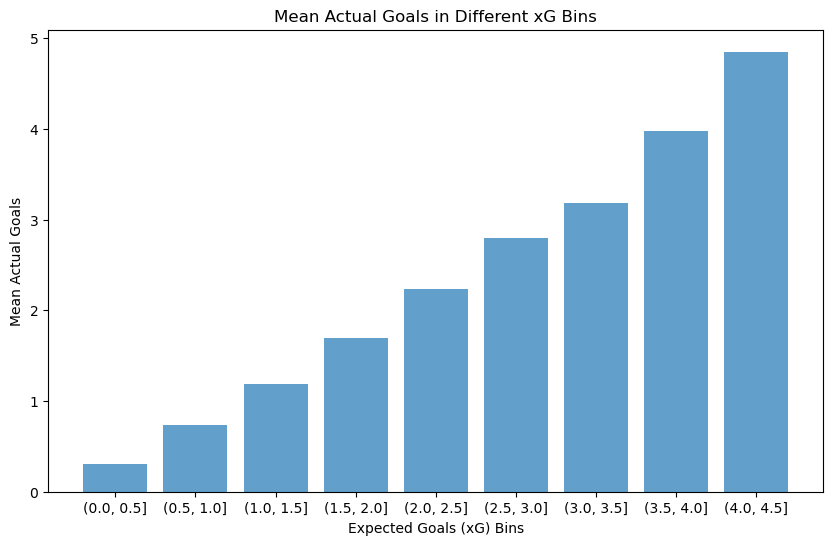

local_xG_bin
(0.0, 0.5]    0.305556
(0.5, 1.0]    0.738683
(1.0, 1.5]    1.188084
(1.5, 2.0]    1.690642
(2.0, 2.5]    2.232036
(2.5, 3.0]    2.800539
(3.0, 3.5]    3.188679
(3.5, 4.0]    3.981481
(4.0, 4.5]    4.851852
Name: home_score, dtype: float64


In [25]:
#We want to plot the mean of goals in some binned predictions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default') # 'default' is a style that has lighter axes

# Assuming df is your DataFrame and it has columns 'xG' and 'Goals'
df2 = df[(df.date>"2010-01-01")].copy()

# Define the bins
bins = np.array([0.0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])  # adjust this to fit your data

# Use pd.cut to bin the data based on the 'xG' column

df2['local_xG_bin'] = pd.cut(df2['XGhome'], bins)

# Group by the bin and calculate the mean of the 'Goals' column
binned_means = df2.groupby('local_xG_bin')['home_score'].mean()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(binned_means.index.astype(str), binned_means.values, alpha=0.7)
plt.title('Mean Actual Goals in Different xG Bins')
plt.xlabel('Expected Goals (xG) Bins')
plt.ylabel('Mean Actual Goals')
plt.show()
print(binned_means)


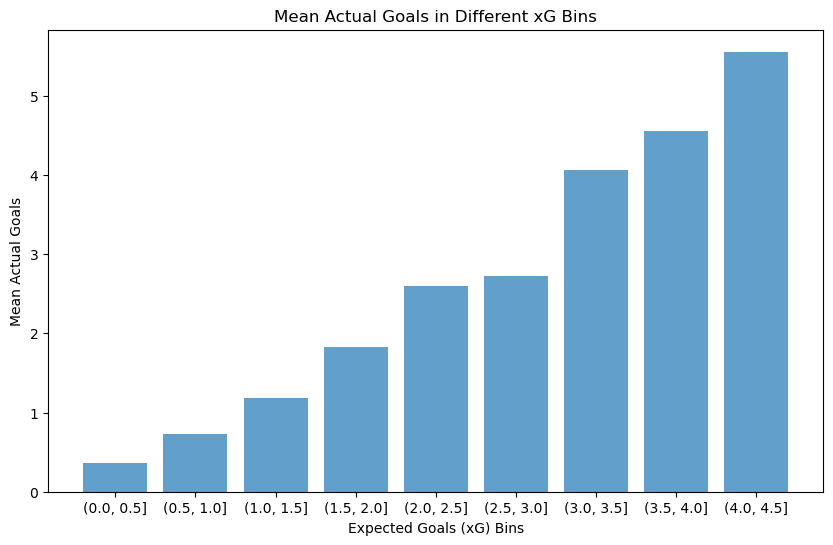

away_xG_bin
(0.0, 0.5]    0.357698
(0.5, 1.0]    0.732057
(1.0, 1.5]    1.185451
(1.5, 2.0]    1.828082
(2.0, 2.5]    2.601050
(2.5, 3.0]    2.726316
(3.0, 3.5]    4.062500
(3.5, 4.0]    4.555556
(4.0, 4.5]    5.555556
Name: away_score, dtype: float64


In [26]:
# Use pd.cut to bin the data based on the 'xG' column
df2['away_xG_bin'] = pd.cut(df2['XGaway'], bins)

# Group by the bin and calculate the mean of the 'Goals' column
binned_means = df2.groupby('away_xG_bin')['away_score'].mean()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(binned_means.index.astype(str), binned_means.values, alpha=0.7)
plt.title('Mean Actual Goals in Different xG Bins')
plt.xlabel('Expected Goals (xG) Bins')
plt.ylabel('Mean Actual Goals')
plt.show()
print(binned_means)

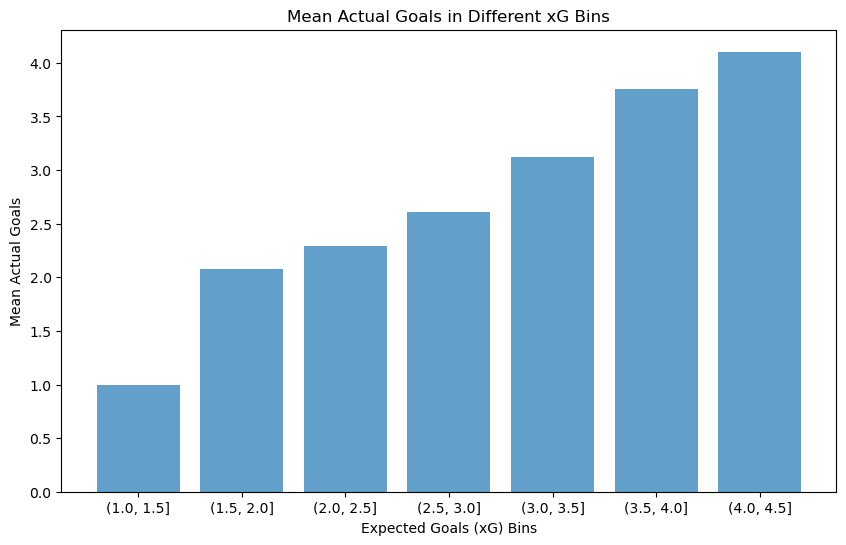

total_xG_bin
(0.0, 0.5]         NaN
(0.5, 1.0]         NaN
(1.0, 1.5]    1.000000
(1.5, 2.0]    2.081361
(2.0, 2.5]    2.295172
(2.5, 3.0]    2.606329
(3.0, 3.5]    3.124198
(3.5, 4.0]    3.759853
(4.0, 4.5]    4.103806
Name: total_score, dtype: float64


In [27]:
df2['total_score'] = df2['away_score'] + df2['home_score']
df2['total_xG']=df2['XGhome']+df2['XGaway']
df2['total_xG_bin'] = pd.cut(df2['total_xG'], bins)

# Group by the bin and calculate the mean of the 'Goals' column
binned_means = df2.groupby('total_xG_bin')['total_score'].mean()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(binned_means.index.astype(str), binned_means.values, alpha=0.7)
plt.title('Mean Actual Goals in Different xG Bins')
plt.xlabel('Expected Goals (xG) Bins')
plt.ylabel('Mean Actual Goals')
plt.show()
print(binned_means)

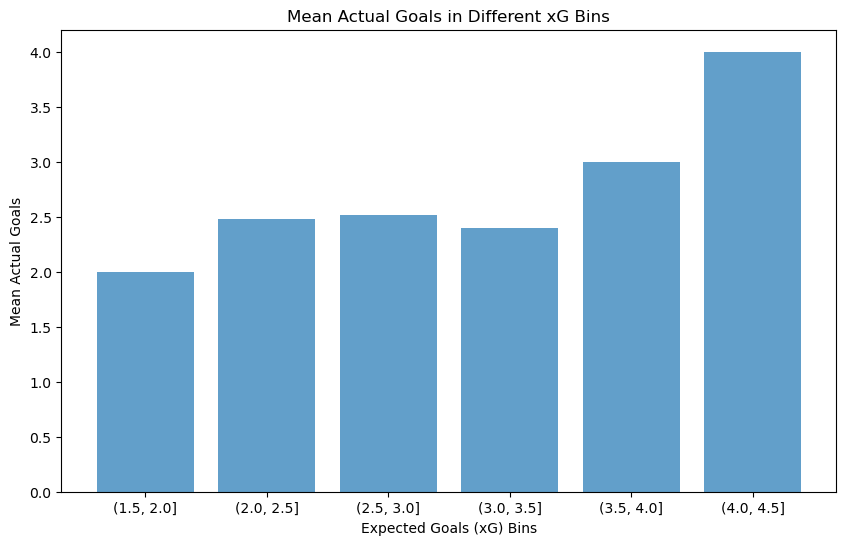

total_xG_bin
(0.0, 0.5]         NaN
(0.5, 1.0]         NaN
(1.0, 1.5]         NaN
(1.5, 2.0]    2.000000
(2.0, 2.5]    2.480519
(2.5, 3.0]    2.514286
(3.0, 3.5]    2.400000
(3.5, 4.0]    3.000000
(4.0, 4.5]    4.000000
Name: total_score, dtype: float64


In [28]:
#lo probamos en las eurocopas
#We want to plot the mean of goals in some binned predictions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default') # 'default' is a style that has lighter axes

# Assuming df is your DataFrame and it has columns 'xG' and 'Goals'
df2 = df[(df.date>"2010-01-01") & (df.tournament=="UEFA Euro")].copy()


df2['total_score'] = df2['away_score'] + df2['home_score']
df2['total_xG']=df2['XGhome']+df2['XGaway']
df2['total_xG_bin'] = pd.cut(df2['total_xG'], bins)

# Group by the bin and calculate the mean of the 'Goals' column
binned_means = df2.groupby('total_xG_bin')['total_score'].mean()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(binned_means.index.astype(str), binned_means.values, alpha=0.7)
plt.title('Mean Actual Goals in Different xG Bins')
plt.xlabel('Expected Goals (xG) Bins')
plt.ylabel('Mean Actual Goals')
plt.show()
print(binned_means)

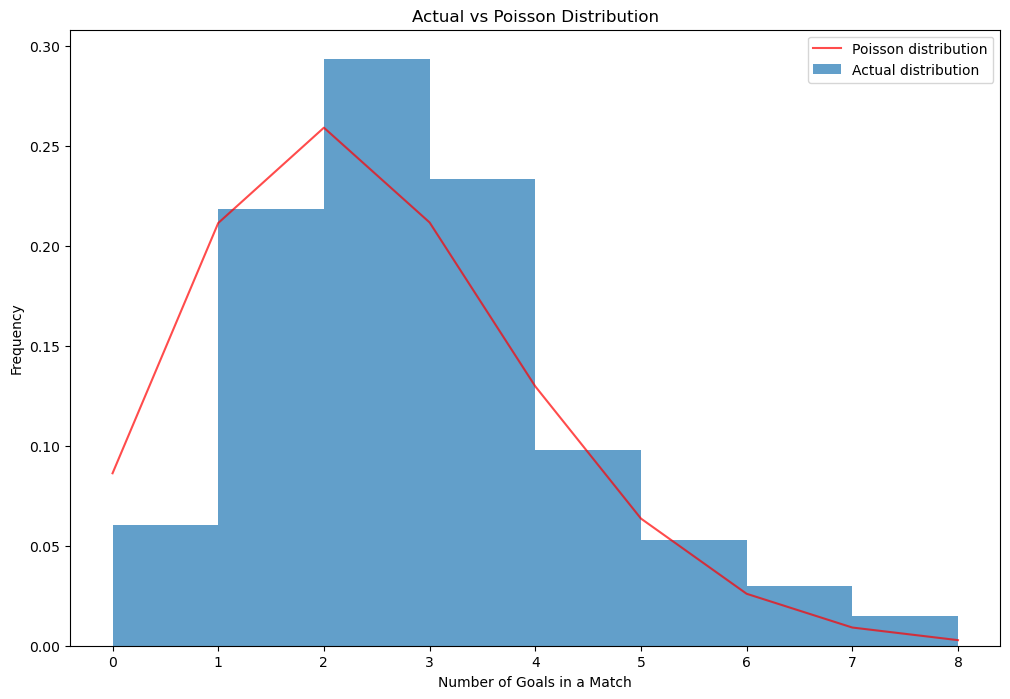

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Assuming 'total_goals' is the column with the number of goals in a match
data = df2['total_score']

# Calculate the mean of the data as it will be the lambda (rate parameter) for the Poisson distribution
mu = data.mean()

# Create a range of numbers from 0 to the maximum number of goals in a match (this will be our x-axis)
k = np.arange(0, data.max()+1)

# Create a Poisson distribution with the mean obtained
poisson_pmf = poisson.pmf(k, mu)

plt.figure(figsize=(12,8))

# Plot the actual distribution of goals
plt.hist(data, bins=k, density=True, alpha=0.7, label='Actual distribution')

# Plot the Poisson distribution
plt.plot(k, poisson_pmf, 'r-', alpha=0.7, label='Poisson distribution')

plt.title('Actual vs Poisson Distribution')
plt.xlabel('Number of Goals in a Match')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Como los goles se adaptan a la distribucion de poisson

Total goals probabilities:
Probability of total 0 goals: 0.07326255555493673
Probability of total 1 goals: 0.14652511110987346
Probability of total 2 goals: 0.1953668148131646
Probability of total 3 goals: 0.1953668148131646
Probability of total 4 goals: 0.15629345185053173
Probability of total 5 goals: 0.10419563456702115
Probability of total 6 goals: 0.05158904953660129
Probability of total 7 goals: 0.018830766232479833
Probability of total 8 goals: 0.005265746180511078
Probability of total 9 goals: 0.0011676219791568047
Probability of total 10 goals: 0.00020605093749825957
Probability of total 11 goals: 2.5756367187282433e-05
Probability for draw: 0.13111994171330218
Probability for away win: 0.09378243070715539
Probability for home win: 0.7415086404104034


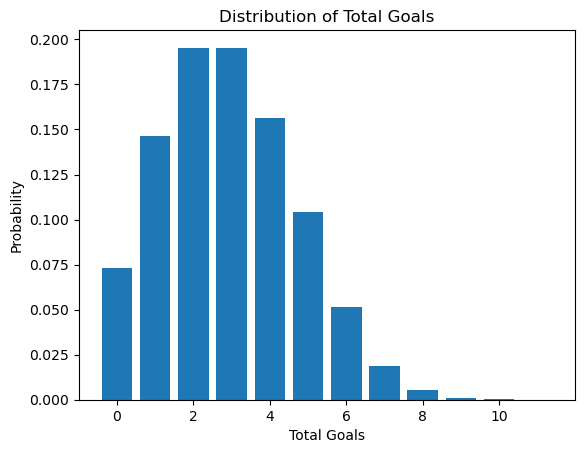

In [29]:
import numpy as np
from scipy.stats import poisson

def calculate_match_probabilities(team_a_lambda, team_b_lambda, max_goals=6):
    # Create a matrix of zeros
    matrix = np.zeros((max_goals + 1, max_goals + 1))

    # Populate the matrix with probabilities
    for i in range(max_goals + 1):
        for j in range(max_goals + 1):
            matrix[i, j] = poisson.pmf(i, team_a_lambda) * poisson.pmf(j, team_b_lambda)

    # Calculate the total goals probabilities
    total_goals_prob = [np.sum(np.diag(matrix[::-1], k)) for k in range(-(max_goals-1), max_goals+1)]

    # Calculate the probability for the specific result
    draw_prob = np.sum(np.diag(matrix))
    away_prob = np.sum(np.triu(matrix, 1))
    local_prob = np.sum(np.tril(matrix, -1))

    return total_goals_prob, draw_prob, away_prob, local_prob

# Example usage
team_a_lambda = 3
team_b_lambda = 1
total_goals_prob, draw_prob, away_prob, local_prob = calculate_match_probabilities(team_a_lambda, team_b_lambda)

# Print the results
print("Total goals probabilities:")
for goals, prob in enumerate(total_goals_prob):
    print(f'Probability of total {goals} goals: {prob}')

print(f"Probability for draw: {draw_prob}")
print(f"Probability for away win: {away_prob}")
print(f"Probability for home win: {local_prob}")

import matplotlib.pyplot as plt
# Plot the distribution of possible total goals
plt.bar(range(len(total_goals_prob)), total_goals_prob)
plt.xlabel('Total Goals')
plt.ylabel('Probability')
plt.title('Distribution of Total Goals')
plt.show()




In [30]:
#Let's see how to apply this to the eurocup clasification
df_euro=df[(df.date>"2022-12-31") & (df.tournament=='UEFA Euro qualification')].copy()
df_euro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 45212 to 46399
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          239 non-null    object 
 1   home_team     239 non-null    object 
 2   away_team     239 non-null    object 
 3   home_score    239 non-null    int64  
 4   away_score    239 non-null    int64  
 5   tournament    239 non-null    object 
 6   city          239 non-null    object 
 7   country       239 non-null    object 
 8   neutral       239 non-null    bool   
 9   Elo_h_after   239 non-null    float64
 10  Elo_a_after   239 non-null    float64
 11  Elo_h_before  239 non-null    float64
 12  Elo_a_before  239 non-null    float64
 13  probH         239 non-null    float64
 14  probA         239 non-null    float64
 15  att_h_after   239 non-null    float64
 16  att_a_after   239 non-null    float64
 17  att_h_before  239 non-null    float64
 18  att_a_before  239 non-nu

In [31]:
# Function to apply to each row of the DataFrame
def apply_calculation(row):
    
    total_goals_prob, draw_prob, away_prob, local_prob = calculate_match_probabilities(row['XGhome'], row['XGaway'])
    return pd.Series({
        'total_goals_prob': total_goals_prob,
        'draw_prob': draw_prob,
        'away_prob': away_prob,
        'local_prob': local_prob
    })

# Apply the function to each row
calculated_variables = df_euro.apply(apply_calculation, axis=1)

# Concatenate the result with the original DataFrame
matches_df = pd.concat([df_euro, calculated_variables], axis=1)

# Print the DataFrame with calculated probabilities
print(matches_df)
df_euro[['total_goals_prob', 'draw_prob', 'away_prob', 'local_prob']] = df_euro[['XGhome','XGaway']].apply(apply_calculation, axis=1)

# Iterate over each row in the DataFrame
for index, row in df_euro.iterrows():
    # Iterate over each element in the 'total_goals_prob' list
    for i, prob in enumerate(row['total_goals_prob']):
        # Create new column with the name 'prob_index_goals_i' and assign the corresponding value
        df_euro.at[index, f'prob_index_goals_{i}'] = prob

# Display the modified DataFrame
print(df_euro)


             date        home_team         away_team  home_score  away_score  \
45212  2023-03-23            Italy           England           1           2   
45213  2023-03-23  North Macedonia             Malta           2           1   
45214  2023-03-23          Denmark           Finland           3           1   
45215  2023-03-23       San Marino  Northern Ireland           0           2   
45216  2023-03-23       Kazakhstan          Slovenia           1           2   
...           ...              ...               ...         ...         ...   
46304  2024-03-21          Georgia        Luxembourg           2           0   
46305  2024-03-21           Greece        Kazakhstan           5           0   
46397  2024-03-26            Wales            Poland           0           0   
46398  2024-03-26          Ukraine           Iceland           2           1   
46399  2024-03-26          Georgia            Greece           0           0   

                    tournament        c

In [32]:
df_euro.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Elo_h_after,...,prob_index_goals_2,prob_index_goals_3,prob_index_goals_4,prob_index_goals_5,prob_index_goals_6,prob_index_goals_7,prob_index_goals_8,prob_index_goals_9,prob_index_goals_10,prob_index_goals_11
45212,2023-03-23,Italy,England,1,2,UEFA Euro qualification,Napoli,Italy,False,1663.795,...,0.177813,0.087627,0.034546,0.011350,0.003120,0.000711,0.000133,0.000020,2.431901e-06,1.949053e-07
45213,2023-03-23,North Macedonia,Malta,2,1,UEFA Euro qualification,Skopje,North Macedonia,False,1325.915,...,0.222740,0.177685,0.113395,0.060305,0.018497,0.003673,0.000527,0.000059,5.231086e-06,3.498840e-07
45214,2023-03-23,Denmark,Finland,3,1,UEFA Euro qualification,Copenhagen,Denmark,False,1556.510,...,0.208300,0.124277,0.059317,0.023593,0.006591,0.001308,0.000195,0.000023,2.153052e-06,1.454762e-07
45215,2023-03-23,San Marino,Northern Ireland,0,2,UEFA Euro qualification,Serravalle,San Marino,False,813.905,...,0.218717,0.144133,0.075986,0.033383,0.007040,0.000908,0.000083,0.000006,3.269051e-07,1.413470e-08
45216,2023-03-23,Kazakhstan,Slovenia,1,2,UEFA Euro qualification,Astana,Kazakhstan,False,1190.270,...,0.202775,0.116161,0.053235,0.020331,0.006518,0.001741,0.000384,0.000069,9.703250e-06,9.127558e-07


Accuracy: 0.67
predicted_outcome   away_win   home_win
actual_outcome                         
away_win           86.746988  13.253012
draw               60.000000  40.000000
home_win           21.621622  78.378378


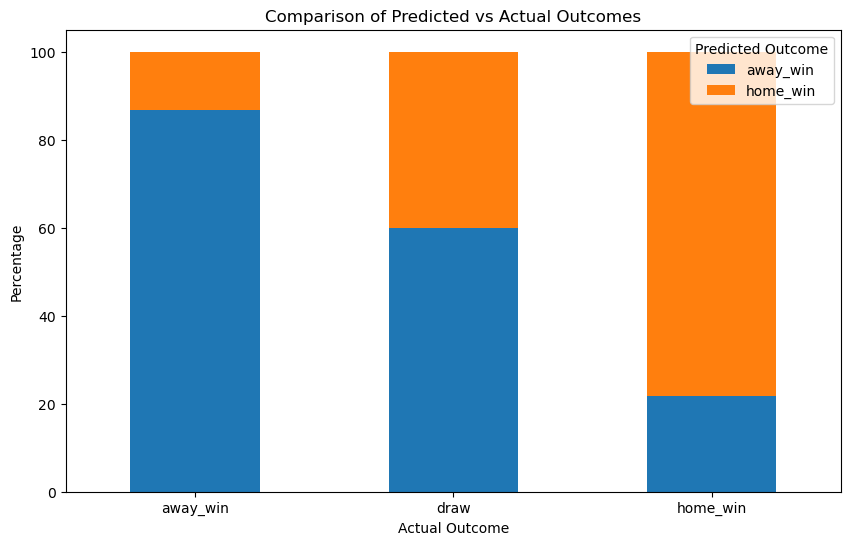

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing predictions and actual outcomes

# Compute the predicted outcome based on the continuous predictions of local probability
df_euro['predicted_outcome'] = np.where(df_euro['local_prob'] >= 0.5, 'home_win', 'away_win')

# Compute the actual outcome based on the home and away scores
df_euro['actual_outcome'] = np.where(df_euro['home_score'] > df_euro['away_score'], 'home_win',
                                 np.where(df_euro['home_score'] == df_euro['away_score'], 'draw', 'away_win'))

df_euro['home_win_flag'] = np.where(df_euro['actual_outcome']=='home_win', 1,0)
df_euro['draw_flag'] = np.where(df_euro['actual_outcome']=='draw', 1,0)
df_euro['away_win_flag'] = np.where(df_euro['actual_outcome']=='away_win', 1,0)
# Compute accuracy
accuracy = accuracy_score(df_euro['actual_outcome'], df_euro['predicted_outcome'])

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")

# Visualize comparison
outcome_comparison = pd.crosstab(df_euro['actual_outcome'], df_euro['predicted_outcome'], normalize='index') * 100
print(outcome_comparison)

# Plot comparison
outcome_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Comparison of Predicted vs Actual Outcomes')
plt.xlabel('Actual Outcome')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Predicted Outcome')
plt.show()


actual_outcome    away_win       draw   home_win
probability_bin                                 
(0.0, 0.2]       75.000000  14.583333  10.416667
(0.2, 0.3]       60.000000  25.714286  14.285714
(0.3, 0.4]       47.058824  35.294118  17.647059
(0.4, 0.5]       30.434783  21.739130  47.826087
(0.5, 0.6]       15.789474  10.526316  73.684211
(0.6, 0.7]       18.181818  22.727273  59.090909
(0.7, 0.8]        7.692308  20.512821  71.794872
(0.8, 1.0]        2.777778   8.333333  88.888889


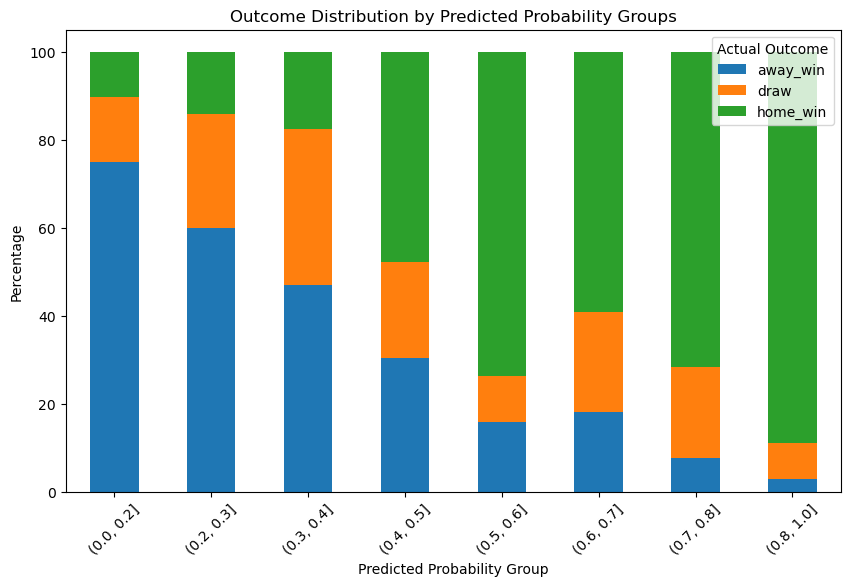

In [34]:
import pandas as pd

# Assuming 'df' is your DataFrame containing predictions and actual outcomes

# Define bins for grouping based on predicted probabilities (adjust as needed)
bins = [0, 0.2, 0.3,0.4,0.5,0.6, 0.7,0.8,1]

# Create a new column indicating the bin for each match based on predicted probabilities
df_euro['probability_bin'] = pd.cut(df_euro['local_prob'], bins=bins)

# Group the DataFrame by the probability bins and compute the percentage of actual outcomes within each group
outcome_distribution = df_euro.groupby('probability_bin')['actual_outcome'].value_counts(normalize=True).unstack() * 100

# Fill missing outcome percentages (e.g., if no matches in a group had a certain outcome) with 0
outcome_distribution = outcome_distribution.fillna(0)

# Print outcome distribution
print(outcome_distribution)

# Plot outcome distribution
outcome_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Outcome Distribution by Predicted Probability Groups')
plt.xlabel('Predicted Probability Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Actual Outcome')
plt.show()


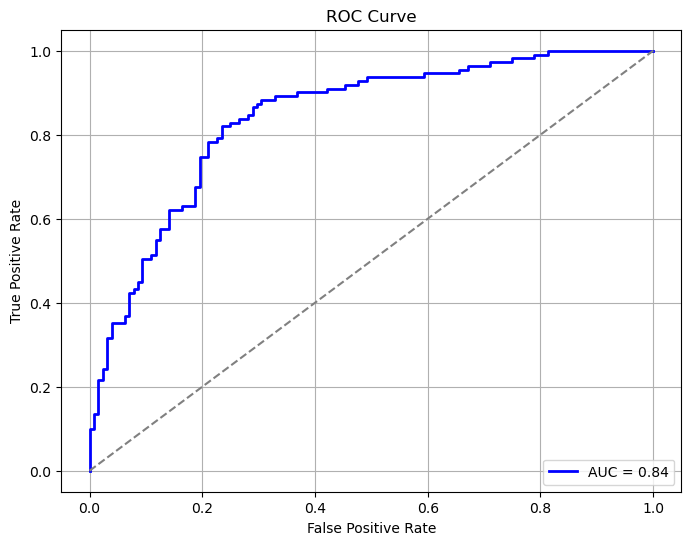

AUC: 0.84


In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing predictions and actual outcomes


# Compute ROC curve
fpr, tpr, thresholds = roc_curve(df_euro['home_win_flag'], df_euro['local_prob'])

# Compute AUC
auc = roc_auc_score(df_euro['home_win_flag'], df_euro['local_prob'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {auc:.2f}")

In [36]:
# Compute AUC
auc_away = roc_auc_score(df_euro['away_win_flag'], df_euro['away_prob'])
auc_draw = roc_auc_score(df_euro['draw_flag'], df_euro['draw_prob'])

print(auc_away)
print(auc_draw)

0.8593605189990732
0.6525773195876289


Validation for the total goals of the match

In [37]:
df_euro['total_score']=df_euro.home_score+df_euro.away_score
df_euro['Goals_0_1'] = np.where(df_euro['total_score']<=1, 1,0)
df_euro['Goals_2_3'] = np.where((df_euro['total_score'] > 1) & (df_euro['total_score'] < 4), 1, 0)
df_euro['Goals_4'] = np.where(df_euro['total_score']>=4, 1,0)

df_euro['XG_0_1'] = df_euro.prob_index_goals_0+df_euro.prob_index_goals_1
df_euro['XG_2_3'] = df_euro.prob_index_goals_3+df_euro.prob_index_goals_2
df_euro['XG_4'] = 1-df_euro['XG_0_1']-df_euro['XG_2_3']

roc_auc_score(df_euro['Goals_0_1'], df_euro['XG_0_1'])
roc_auc_score(df_euro['Goals_2_3'], df_euro['XG_2_3'])
roc_auc_score(df_euro['Goals_4'], df_euro['XG_4'])

0.6185446009389671

In [38]:
df_euro['total_score']=df_euro.home_score+df_euro.away_score

Poisson distribution to predict. HERE THE VALIDATIONS METRICS FOR THE PREDICTED VALUES, EITHER THE RESULT AND TOTAL NUMBER OF GOALS GRUPPED.

In [39]:
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Elo_h_after,...,att_h_after,att_a_after,att_h_before,att_a_before,def_h_after,def_a_after,def_h_before,def_a_before,XGhome,XGaway
46437,2024-03-26,Scotland,Northern Ireland,0,1,Friendly,Glasgow,Scotland,False,1469.525,...,1.316534,0.918251,1.324345,0.916345,0.859619,0.921028,0.857713,0.928839,1.562231,0.618867
46438,2024-03-26,Senegal,Benin,1,0,Friendly,Amiens,France,True,1580.555,...,1.625823,1.019290,1.630110,1.022135,0.553804,1.135106,0.556649,1.139393,1.857336,0.568970
46439,2024-03-26,Slovenia,Portugal,2,0,Friendly,Ljubljana,Slovenia,False,1418.165,...,1.207189,2.290835,1.201448,2.298603,0.850576,0.564060,0.858344,0.558320,0.851906,1.553537
46440,2024-03-26,Spain,Brazil,3,3,Friendly,Madrid,Spain,False,1671.700,...,2.549765,2.405043,2.541535,2.394685,0.502816,0.427661,0.492459,0.419430,1.353815,0.928570
46441,2024-03-26,Finland,Estonia,2,1,Friendly,Helsinki,Finland,False,1383.070,...,1.145936,0.793150,1.145804,0.790830,0.863118,1.356504,0.860798,1.356373,1.973756,0.536019


Trying to fit a bayesian model

# Simulacion de la Copa America

Se extraen los partidos de wikipedia gracias a chatgpt

In [138]:
matches_data = [
    # Grupo A
    {"Grupo": "A", "Home_Team": "Argentina", "Away_Team": "Canada"},
    {"Grupo": "A", "Home_Team": "Peru", "Away_Team": "Chile"},
    {"Grupo": "A", "Home_Team": "Peru", "Away_Team": "Canada"},
    {"Grupo": "A", "Home_Team": "Chile", "Away_Team": "Argentina"},
    {"Grupo": "A", "Home_Team": "Argentina", "Away_Team": "Peru"},
    {"Grupo": "A", "Home_Team": "Canada", "Away_Team": "Chile"},
    # Grupo B
    {"Grupo": "B", "Home_Team": "Ecuador", "Away_Team": "Venezuela"},
    {"Grupo": "B", "Home_Team": "Mexico", "Away_Team": "Jamaica"},
    {"Grupo": "B", "Home_Team": "Ecuador", "Away_Team": "Jamaica"},
    {"Grupo": "B", "Home_Team": "Venezuela", "Away_Team": "Mexico"},
    {"Grupo": "B", "Home_Team": "Mexico", "Away_Team": "Ecuador"},
    {"Grupo": "B", "Home_Team": "Jamaica", "Away_Team": "Venezuela"},
    # Grupo C
    {"Grupo": "C", "Home_Team": "United States", "Away_Team": "Bolivia"},
    {"Grupo": "C", "Home_Team": "Uruguay", "Away_Team": "Panama"},
    {"Grupo": "C", "Home_Team": "Panama", "Away_Team": "United States"},
    {"Grupo": "C", "Home_Team": "Uruguay", "Away_Team": "Bolivia"},
    {"Grupo": "C", "Home_Team": "United States", "Away_Team": "Uruguay"},
    {"Grupo": "C", "Home_Team": "Bolivia", "Away_Team": "Panama"},
    # Grupo D
    {"Grupo": "D", "Home_Team": "Colombia", "Away_Team": "Paraguay"},
    {"Grupo": "D", "Home_Team": "Brazil", "Away_Team": "Costa Rica"},
    {"Grupo": "D", "Home_Team": "Colombia", "Away_Team": "Costa Rica"},
    {"Grupo": "D", "Home_Team": "Paraguay", "Away_Team": "Brazil"},
    {"Grupo": "D", "Home_Team": "Brazil", "Away_Team": "Colombia"},
    {"Grupo": "D", "Home_Team": "Costa Rica", "Away_Team": "Paraguay"},
]

# Create a dataframe
matches_df = pd.DataFrame(matches_data)

# Display the dataframe
print(matches_df)

   Grupo      Home_Team      Away_Team
0      A      Argentina         Canada
1      A           Peru          Chile
2      A           Peru         Canada
3      A          Chile      Argentina
4      A      Argentina           Peru
5      A         Canada          Chile
6      B        Ecuador      Venezuela
7      B         Mexico        Jamaica
8      B        Ecuador        Jamaica
9      B      Venezuela         Mexico
10     B         Mexico        Ecuador
11     B        Jamaica      Venezuela
12     C  United States        Bolivia
13     C        Uruguay         Panama
14     C         Panama  United States
15     C        Uruguay        Bolivia
16     C  United States        Uruguay
17     C        Bolivia         Panama
18     D       Colombia       Paraguay
19     D         Brazil     Costa Rica
20     D       Colombia     Costa Rica
21     D       Paraguay         Brazil
22     D         Brazil       Colombia
23     D     Costa Rica       Paraguay


In [139]:
# Merge the dataframes based on the "Home Team" column and rename columns with prefix
merged_df = pd.merge(matches_df, attdef[["Team", "att", "def"]].add_prefix('Home_'),left_on="Home_Team", right_on="Home_Team", how="left")
group_matches = pd.merge(merged_df, attdef[["Team", "att", "def"]].add_prefix('Away_'),left_on="Away_Team", right_on="Away_Team", how="left")

# Display the merged dataframe
print(group_matches)

   Grupo      Home_Team      Away_Team  Home_att  Home_def  Away_att  Away_def
0      A      Argentina         Canada  2.266175  0.448456  1.550977  0.808584
1      A           Peru          Chile  1.329787  0.730013  1.605545  0.756210
2      A           Peru         Canada  1.329787  0.730013  1.550977  0.808584
3      A          Chile      Argentina  1.605545  0.756210  2.266175  0.448456
4      A      Argentina           Peru  2.266175  0.448456  1.329787  0.730013
5      A         Canada          Chile  1.550977  0.808584  1.605545  0.756210
6      B        Ecuador      Venezuela  1.555785  0.704726  1.195957  0.852626
7      B         Mexico        Jamaica  1.767032  0.641062  1.100345  0.933594
8      B        Ecuador        Jamaica  1.555785  0.704726  1.100345  0.933594
9      B      Venezuela         Mexico  1.195957  0.852626  1.767032  0.641062
10     B         Mexico        Ecuador  1.767032  0.641062  1.555785  0.704726
11     B        Jamaica      Venezuela  1.100345  0.

In [140]:
#Computing the expected goals
group_matches['XGhome']=group_matches['Home_att']*group_matches['Away_def']
group_matches['XGaway']=group_matches['Home_def']*group_matches['Away_att']

group_matches[['total_goals_prob', 'draw_prob', 'away_prob', 'local_prob']] = group_matches[['XGhome','XGaway']].apply(apply_calculation, axis=1)
group_matches.drop("total_goals_prob",axis=1, inplace=True)

In [152]:
# Define a function to determine the result based on probabilities
def determine_result_random(row):
    random_number = np.random.random()
    if random_number < row["draw_prob"]:
        return "Draw"
    elif random_number < row["draw_prob"] + row["away_prob"]:
        return row["Away_Team"]
    else:
        return row["Home_Team"]
    

def determine_result(row):
    max_prob = max(row["draw_prob"], row["away_prob"], row["local_prob"])
    if row["draw_prob"] == max_prob:
        return "Draw"
    elif row["away_prob"] == max_prob:
        return row["Away_Team"]
    else:
        return row["Home_Team"]
    
def determine_result_knockout(row):
    if row["away_prob"] >row["home_prob"]:
        return row["Away_Team"]
    else:
        return row["Home_Team"]
    
def determine_result_knockout_random(row):
    random_number = np.random.random()
    if random_number < row["draw_prob"]:
        random_number2 = np.random.random()
        if random_number < 0.5:
            return row["Away_Team"]
        else:
            return row["Home_Team"]
    elif random_number < row["draw_prob"] + row["away_prob"]:
        return row["Away_Team"]
    else:
        return row["Home_Team"]
    
# Apply the function to create the "Results" column
group_matches["Result"] = group_matches.apply(determine_result, axis=1)

# Display the dataframe with the new "Results" column
print(group_matches)

   Grupo      Home_Team      Away_Team  Home_att  Home_def  Away_att  \
0      A      Argentina         Canada  2.266175  0.448456  1.550977   
1      A           Peru          Chile  1.329787  0.730013  1.605545   
2      A           Peru         Canada  1.329787  0.730013  1.550977   
3      A          Chile      Argentina  1.605545  0.756210  2.266175   
4      A      Argentina           Peru  2.266175  0.448456  1.329787   
5      A         Canada          Chile  1.550977  0.808584  1.605545   
6      B        Ecuador      Venezuela  1.555785  0.704726  1.195957   
7      B         Mexico        Jamaica  1.767032  0.641062  1.100345   
8      B        Ecuador        Jamaica  1.555785  0.704726  1.100345   
9      B      Venezuela         Mexico  1.195957  0.852626  1.767032   
10     B         Mexico        Ecuador  1.767032  0.641062  1.555785   
11     B        Jamaica      Venezuela  1.100345  0.933594  1.195957   
12     C  United States        Bolivia  1.768648  0.678124  1.15

In [119]:
group_matches[group_matches.Grupo=="A"][["Home_Team","Away_Team","Result"]]

,Home_Team,Away_Team,Result
0,Argentina,Canada,Argentina
1,Peru,Chile,Chile
2,Peru,Canada,Canada
3,Chile,Argentina,Argentina
4,Argentina,Peru,Argentina
5,Canada,Chile,Chile


In [120]:
# Define a function to calculate points based on match results
def calculate_points(result, home_team, team):
    if result == "Draw":
        return 1
    elif result == home_team:
        return 3
    elif result == team:
        return 0

# Apply the function to create the "Points" column for both Home and Away teams
group_matches["Points_Home"] = group_matches.apply(lambda row: calculate_points(row["Result"], row["Home_Team"], row["Away_Team"]), axis=1)
group_matches["Points_Away"] = group_matches.apply(lambda row: calculate_points(row["Result"], row["Away_Team"], row["Home_Team"]), axis=1)



# Create a dataframe to store points for each teams

standings = pd.DataFrame(columns=["Grupo","Team", "Points"])

# Concatenate Home and Away points by group
for group_name, group_data in group_matches.groupby("Grupo"):
    group_points_df = pd.DataFrame(columns=["Team", "Points"])
    for team in set(group_data["Home_Team"]).union(set(group_data["Away_Team"])):
        home_points = group_data.loc[group_data["Home_Team"] == team, "Points_Home"].sum()
        away_points = group_data.loc[group_data["Away_Team"] == team, "Points_Away"].sum()
        total_points = home_points + away_points
        group_points_df = group_points_df.append({"Team": team, "Points": total_points}, ignore_index=True)
    group_points_df = group_points_df.sort_values(by=["Points"], ascending=False).reset_index(drop=True)
    group_points_df["Grupo"] = group_name
    group_points_df["Rank"] = range(1, len(group_points_df) + 1)
    standings = pd.concat([standings, group_points_df], ignore_index=True)

# Display the standings
print(standings)

   Grupo           Team Points  Rank
0      A      Argentina      9   1.0
1      A          Chile      6   2.0
2      A         Canada      3   3.0
3      A           Peru      0   4.0
4      B         Mexico      9   1.0
5      B        Ecuador      6   2.0
6      B      Venezuela      3   3.0
7      B        Jamaica      0   4.0
8      C        Uruguay      9   1.0
9      C  United States      6   2.0
10     C         Panama      3   3.0
11     C        Bolivia      0   4.0
12     D         Brazil      9   1.0
13     D       Colombia      6   2.0
14     D     Costa Rica      3   3.0
15     D       Paraguay      0   4.0


MonteCarlo Simulation

In [121]:
# Simulate match results and calculate standings
num_simulations = 10  # Number of simulations
standings_list = []  # List to store standings for each simulation

for _ in range(num_simulations):
    # Apply the function to create the "Results" column
    group_matches["Result"] = group_matches.apply(determine_result_random, axis=1)
    # Apply the function to create the "Points" column for both Home and Away teams
    group_matches["Points_Home"] = group_matches.apply(lambda row: calculate_points(row["Result"], row["Home_Team"], row["Away_Team"]), axis=1)
    group_matches["Points_Away"] = group_matches.apply(lambda row: calculate_points(row["Result"], row["Away_Team"], row["Home_Team"]), axis=1)
    # Create a dataframe to store points for each teams
    standings = pd.DataFrame(columns=["Grupo","Team", "Points"])
    # Concatenate Home and Away points by group
    for group_name, group_data in group_matches.groupby("Grupo"):
        group_points_df = pd.DataFrame(columns=["Team", "Points"])
        for team in set(group_data["Home_Team"]).union(set(group_data["Away_Team"])):
            home_points = group_data.loc[group_data["Home_Team"] == team, "Points_Home"].sum()
            away_points = group_data.loc[group_data["Away_Team"] == team, "Points_Away"].sum()
            total_points = home_points + away_points
            group_points_df = group_points_df.append({"Team": team, "Points": total_points}, ignore_index=True)
        group_points_df = group_points_df.sort_values(by=["Points"], ascending=False).reset_index(drop=True)
        group_points_df["Grupo"] = group_name
        group_points_df["Rank"] = range(1, len(group_points_df) + 1)
        group_points_df["Qualified"]=np.where(group_points_df["Rank"]<3,1,0)
        standings = pd.concat([standings, group_points_df], ignore_index=True)
        standings_list.append(standings)

In [124]:
standings_list

[  Grupo       Team  Points  Rank  Qualified
 0     A  Argentina     9.0   1.0        1.0
 1     A     Canada     3.0   2.0        1.0
 2     A      Chile     3.0   3.0        0.0
 3     A       Peru     0.0   4.0        0.0,
   Grupo       Team  Points  Rank  Qualified
 0     A  Argentina     9.0   1.0        1.0
 1     A     Canada     3.0   2.0        1.0
 2     A      Chile     3.0   3.0        0.0
 3     A       Peru     0.0   4.0        0.0
 4     B     Mexico     9.0   1.0        1.0
 5     B  Venezuela     3.0   2.0        1.0
 6     B    Ecuador     3.0   3.0        0.0
 7     B    Jamaica     0.0   4.0        0.0,
    Grupo           Team  Points  Rank  Qualified
 0      A      Argentina     9.0   1.0        1.0
 1      A         Canada     3.0   2.0        1.0
 2      A          Chile     3.0   3.0        0.0
 3      A           Peru     0.0   4.0        0.0
 4      B         Mexico     9.0   1.0        1.0
 5      B      Venezuela     3.0   2.0        1.0
 6      B        E

In [47]:
# Analyze the distribution of standings
# For example, you can calculate the mean, median, standard deviation, etc.
# You can also plot histograms or other visualizations to explore the distribution further.

# Example: Calculate mean standings
#mean_standings = pd.concat(standings_list).groupby("Team")["Points"].mean().reset_index().sort_values(by=["Points"], ascending=False)
#print("Mean Standings:")
#print(mean_standings)
qualified = pd.concat(standings_list).groupby(["Team","Grupo"])["Qualified"].mean().reset_index().sort_values(by=["Grupo","Qualified"], ascending=False)
print("Qualified:")
print(qualified)

Qualified:
             Team Grupo  Qualified
2          Brazil     D      0.826
5        Colombia     D      0.433
6      Costa Rica     D      0.421
11       Paraguay     D      0.320
13  United States     C      0.852
14        Uruguay     C      0.652
10         Panama     C      0.300
1         Bolivia     C      0.196
9          Mexico     B      0.667
15      Venezuela     B      0.544
7         Ecuador     B      0.459
8         Jamaica     B      0.330
0       Argentina     A      0.859
3          Canada     A      0.575
12           Peru     A      0.305
4           Chile     A      0.261


In [101]:
#Knockout rounds

# Extract teams with rank 1 from each group
rank_1_teams = standings[standings["Rank"] == 1]

# Extract teams with rank 2 from each group
rank_2_teams = standings[standings["Rank"] == 2]

# Create pairs of teams with rank 1 and rank 2 from corresponding groups
matches_data = []

team_1 = rank_1_teams[rank_1_teams["Grupo"] == "A"]["Team"].values[0]
team_2 = rank_2_teams[rank_2_teams["Grupo"] == "B"]["Team"].values[0]
matches_data.append({"Home_Team": team_1, "Away_Team": team_2})

team_1 = rank_1_teams[rank_1_teams["Grupo"] == "C"]["Team"].values[0]
team_2 = rank_2_teams[rank_2_teams["Grupo"] == "D"]["Team"].values[0]
matches_data.append({"Home_Team": team_1, "Away_Team": team_2})

team_1 = rank_1_teams[rank_1_teams["Grupo"] == "B"]["Team"].values[0]
team_2 = rank_2_teams[rank_2_teams["Grupo"] == "A"]["Team"].values[0]
matches_data.append({"Home_Team": team_1, "Away_Team": team_2})

team_1 = rank_1_teams[rank_1_teams["Grupo"] == "D"]["Team"].values[0]
team_2 = rank_2_teams[rank_2_teams["Grupo"] == "C"]["Team"].values[0]
matches_data.append({"Home_Team": team_1, "Away_Team": team_2})

# Create matches_knockout dataframe
matches_knockout_df = pd.DataFrame(matches_data)

# Merge the dataframes based on the "Home Team" column and rename columns with prefix
matches_knockout_df = pd.merge(matches_knockout_df, attdef[["Team", "att", "def"]].add_prefix('Home_'),left_on="Home_Team", right_on="Home_Team", how="left")
matches_knockout_df = pd.merge(matches_knockout_df, attdef[["Team", "att", "def"]].add_prefix('Away_'),left_on="Away_Team", right_on="Away_Team", how="left")

#Computing the expected goals
matches_knockout_df['XGhome']=matches_knockout_df['Home_att']*matches_knockout_df['Away_def']
matches_knockout_df['XGaway']=matches_knockout_df['Home_def']*matches_knockout_df['Away_att']

matches_knockout_df[['total_goals_prob', 'draw_prob', 'away_prob', 'home_prob']] = matches_knockout_df[['XGhome','XGaway']].apply(apply_calculation, axis=1)
matches_knockout_df.drop("total_goals_prob",axis=1, inplace=True)
# Apply the function to create the "Results" column
matches_knockout_df["Result"] = matches_knockout_df.apply(determine_result_knockout, axis=1)
matches_knockout_df["Round"] = "Quarterfinal"
# Display the matches_knockout dataframe
print(matches_knockout_df)

   Home_Team  Away_Team  Home_att  Home_def  Away_att  Away_def    XGhome  \
0  Argentina  Venezuela  2.266175  0.448456  1.195957  0.852626  1.932199   
1    Bolivia   Paraguay  1.158427  1.290896  1.214982  0.763626  0.884606   
2     Mexico       Peru  1.767032  0.641062  1.329787  0.730013  1.289955   
3     Brazil    Uruguay  2.405043  0.427661  1.780988  0.546780  1.315029   

     XGaway  draw_prob  away_prob  home_prob     Result         Round  
0  0.536334   0.198032   0.093587   0.704608  Argentina  Quarterfinal  
1  1.568415   0.253769   0.532889   0.212110   Paraguay  Quarterfinal  
2  0.852476   0.286564   0.246344   0.466676     Mexico  Quarterfinal  
3  0.761659   0.286054   0.216358   0.497142     Brazil  Quarterfinal  


In [102]:
#Semi finals

#Knockout rounds

# Create pairs of teams with rank 1 and rank 2 from corresponding groups
matches_data = []

team_1 = matches_knockout_df.iloc[0]["Result"]
team_2 = matches_knockout_df.iloc[1]["Result"]
team_3 = matches_knockout_df.iloc[2]["Result"]
team_4 = matches_knockout_df.iloc[3]["Result"]
matches_data.append({"Home_Team": team_1, "Away_Team": team_2})
matches_data.append({"Home_Team": team_3, "Away_Team": team_4})

# Create matches_knockout dataframe
semifinals = pd.DataFrame(matches_data)

# Merge the dataframes based on the "Home Team" column and rename columns with prefix
semifinals = pd.merge(semifinals, attdef[["Team", "att", "def"]].add_prefix('Home_'),left_on="Home_Team", right_on="Home_Team", how="left")
semifinals = pd.merge(semifinals, attdef[["Team", "att", "def"]].add_prefix('Away_'),left_on="Away_Team", right_on="Away_Team", how="left")

#Computing the expected goals
semifinals['XGhome']=semifinals['Home_att']*semifinals['Away_def']
semifinals['XGaway']=semifinals['Home_def']*semifinals['Away_att']

semifinals[['total_goals_prob', 'draw_prob', 'away_prob', 'home_prob']] = semifinals[['XGhome','XGaway']].apply(apply_calculation, axis=1)
semifinals.drop("total_goals_prob",axis=1, inplace=True)
# Apply the function to create the "Results" column
semifinals["Result"] = semifinals.apply(determine_result_knockout, axis=1)
semifinals["Round"] = "Semifinal"
# Display the matches_knockout dataframe
print(semifinals)

#FINAL
matches_data = []
team_1 = semifinals.iloc[0]["Result"]
team_2 = semifinals.iloc[1]["Result"]
matches_data.append({"Home_Team": team_1, "Away_Team": team_2})


# Create matches_knockout dataframe
final = pd.DataFrame(matches_data)

# Merge the dataframes based on the "Home Team" column and rename columns with prefix
final = pd.merge(final, attdef[["Team", "att", "def"]].add_prefix('Home_'),left_on="Home_Team", right_on="Home_Team", how="left")
final = pd.merge(final, attdef[["Team", "att", "def"]].add_prefix('Away_'),left_on="Away_Team", right_on="Away_Team", how="left")

#Computing the expected goals
final['XGhome']=final['Home_att']*final['Away_def']
final['XGaway']=final['Home_def']*final['Away_att']

final[['total_goals_prob', 'draw_prob', 'away_prob', 'home_prob']] = final[['XGhome','XGaway']].apply(apply_calculation, axis=1)
final.drop("total_goals_prob",axis=1, inplace=True)
# Apply the function to create the "Results" column
final["Result"] = final.apply(determine_result_knockout, axis=1)
final["Round"] = "Final"
# Display the matches_knockout dataframe
print(final)

   Home_Team Away_Team  Home_att  Home_def  Away_att  Away_def    XGhome  \
0  Argentina  Paraguay  2.266175  0.448456  1.214982  0.763626  1.730512   
1     Mexico    Brazil  1.767032  0.641062  2.405043  0.427661  0.755690   

     XGaway  draw_prob  away_prob  home_prob     Result      Round  
0  0.544866   0.225027   0.111518   0.661383  Argentina  Semifinal  
1  1.541782   0.256485   0.559550   0.182868     Brazil  Semifinal  
   Home_Team Away_Team  Home_att  Home_def  Away_att  Away_def    XGhome  \
0  Argentina    Brazil  2.266175  0.448456  2.405043  0.427661  0.969155   

     XGaway  draw_prob  away_prob  home_prob  Result  Round  
0  1.078555   0.303521   0.376464   0.319814  Brazil  Final  


In [86]:
matches_data

[{'Home_Team': 'Brazil', 'Away_Team': 'Brazil'}]

In [103]:
matches_knockout=final.append(semifinals).append(matches_knockout_df).reset_index(drop=True)

In [104]:
matches_knockout

,Home_Team,Away_Team,Home_att,Home_def,Away_att,Away_def,XGhome,XGaway,draw_prob,away_prob,home_prob,Result,Round
0,Argentina,Brazil,2.266175,0.448456,2.405043,0.427661,0.969155,1.078555,0.303521,0.376464,0.319814,Brazil,Final
1,Argentina,Paraguay,2.266175,0.448456,1.214982,0.763626,1.730512,0.544866,0.225027,0.111518,0.661383,Argentina,Semifinal
2,Mexico,Brazil,1.767032,0.641062,2.405043,0.427661,0.755690,1.541782,0.256485,0.559550,0.182868,Brazil,Semifinal
3,Argentina,Venezuela,2.266175,0.448456,1.195957,0.852626,1.932199,0.536334,0.198032,0.093587,0.704608,Argentina,Quarterfinal
4,Bolivia,Paraguay,1.158427,1.290896,1.214982,0.763626,0.884606,1.568415,0.253769,0.532889,0.212110,Paraguay,Quarterfinal
5,Mexico,Peru,1.767032,0.641062,1.329787,0.730013,1.289955,0.852476,0.286564,0.246344,0.466676,Mexico,Quarterfinal
6,Brazil,Uruguay,2.405043,0.427661,1.780988,0.546780,1.315029,0.761659,0.286054,0.216358,0.497142,Brazil,Quarterfinal


In [108]:

# Create a dictionary to store the highest round each team reached
team_round = {}

# Iterate over the rows of the DataFrame
for index, row in matches_knockout.iterrows():
    home_team = row['Home_Team']
    away_team = row['Away_Team']
    match_round = row['Round']
    winner = row['Result']
    
    # Update the round for the winning team
    if winner not in team_round:
        team_round[winner] = match_round

# Create a DataFrame from the team_round dictionary
team_round_df = pd.DataFrame(list(team_round.items()), columns=['Team', 'Last round win'])
team_round_df["Reach_SF"]=1
team_round_df["Reach_Final"]=np.where(team_round_df['Last round win']=="Semifinal",1,0)
team_round_df["Win_Final"]=np.where(team_round_df['Last round win']=="Final",1,0)
print(team_round_df)


        Team Last round win  Reach_SF  Reach_Final  Win_Final
0     Brazil          Final         1            0          1
1  Argentina      Semifinal         1            1          0
2   Paraguay   Quarterfinal         1            0          0
3     Mexico   Quarterfinal         1            0          0


In [112]:
standing2 = pd.merge(standings, team_round_df, how='left', left_on=['Team'], right_on=['Team']).fillna(0)


In [113]:
standing2

,Grupo,Team,Points,Rank,Qualified,Last round win,Reach_SF,Reach_Final,Win_Final
0,A,Argentina,6.0,1.0,1.0,Semifinal,1.0,1.0,0.0
1,A,Peru,3.0,2.0,1.0,0,0.0,0.0,0.0
2,A,Chile,3.0,3.0,0.0,0,0.0,0.0,0.0
3,A,Canada,0.0,4.0,0.0,0,0.0,0.0,0.0
4,B,Mexico,6.0,1.0,1.0,Quarterfinal,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
11,C,Panama,0.0,4.0,0.0,0,0.0,0.0,0.0
12,D,Brazil,6.0,1.0,1.0,Final,1.0,0.0,1.0
13,D,Paraguay,3.0,2.0,1.0,Quarterfinal,1.0,0.0,0.0
14,D,Colombia,3.0,3.0,0.0,0,0.0,0.0,0.0


In [153]:
# Simulate match results and calculate standings
num_simulations = 1000  # Number of simulations
standings_list = []  # List to store standings for each simulation

for _ in range(num_simulations):
    # Apply the function to create the "Results" column
    group_matches["Result"] = group_matches.apply(determine_result_random, axis=1)
    # Apply the function to create the "Points" column for both Home and Away teams
    group_matches["Points_Home"] = group_matches.apply(lambda row: calculate_points(row["Result"], row["Home_Team"], row["Away_Team"]), axis=1)
    group_matches["Points_Away"] = group_matches.apply(lambda row: calculate_points(row["Result"], row["Away_Team"], row["Home_Team"]), axis=1)
    # Create a dataframe to store points for each teams
    standings = pd.DataFrame(columns=["Grupo","Team", "Points"])
    # Concatenate Home and Away points by group
    for group_name, group_data in group_matches.groupby("Grupo"):
        group_points_df = pd.DataFrame(columns=["Team", "Points"])
        for team in set(group_data["Home_Team"]).union(set(group_data["Away_Team"])):
            home_points = group_data.loc[group_data["Home_Team"] == team, "Points_Home"].sum()
            away_points = group_data.loc[group_data["Away_Team"] == team, "Points_Away"].sum()
            total_points = home_points + away_points
            group_points_df = group_points_df.append({"Team": team, "Points": total_points}, ignore_index=True)
        group_points_df = group_points_df.sort_values(by=["Points"], ascending=False).reset_index(drop=True)
        group_points_df["Grupo"] = group_name
        group_points_df["Rank"] = range(1, len(group_points_df) + 1)
        group_points_df["Qualified"]=np.where(group_points_df["Rank"]<3,1,0)
    
        standings = pd.concat([standings, group_points_df], ignore_index=True)
        

    #Knockout rounds
    #QUARTER-FINALS
    # Extract teams with rank 1 from each group
    rank_1_teams = standings[standings["Rank"] == 1]
    # Extract teams with rank 2 from each group
    rank_2_teams = standings[standings["Rank"] == 2]
    # Create pairs of teams with rank 1 and rank 2 from corresponding groups
    matches_data = []
    team_1 = rank_1_teams[rank_1_teams["Grupo"] == "A"]["Team"].values[0]
    team_2 = rank_2_teams[rank_2_teams["Grupo"] == "B"]["Team"].values[0]
    matches_data.append({"Home_Team": team_1, "Away_Team": team_2})
    team_1 = rank_1_teams[rank_1_teams["Grupo"] == "C"]["Team"].values[0]
    team_2 = rank_2_teams[rank_2_teams["Grupo"] == "D"]["Team"].values[0]
    matches_data.append({"Home_Team": team_1, "Away_Team": team_2})
    team_1 = rank_1_teams[rank_1_teams["Grupo"] == "B"]["Team"].values[0]
    team_2 = rank_2_teams[rank_2_teams["Grupo"] == "A"]["Team"].values[0]
    matches_data.append({"Home_Team": team_1, "Away_Team": team_2})
    team_1 = rank_1_teams[rank_1_teams["Grupo"] == "D"]["Team"].values[0]
    team_2 = rank_2_teams[rank_2_teams["Grupo"] == "C"]["Team"].values[0]
    matches_data.append({"Home_Team": team_1, "Away_Team": team_2})
    # Create matches_knockout dataframe
    matches_knockout_df = pd.DataFrame(matches_data)
    # Merge the dataframes based on the "Home Team" column and rename columns with prefix
    matches_knockout_df = pd.merge(matches_knockout_df, attdef[["Team", "att", "def"]].add_prefix('Home_'),left_on="Home_Team", right_on="Home_Team", how="left")
    matches_knockout_df = pd.merge(matches_knockout_df, attdef[["Team", "att", "def"]].add_prefix('Away_'),left_on="Away_Team", right_on="Away_Team", how="left")
    #Computing the expected goals
    matches_knockout_df['XGhome']=matches_knockout_df['Home_att']*matches_knockout_df['Away_def']
    matches_knockout_df['XGaway']=matches_knockout_df['Home_def']*matches_knockout_df['Away_att']
    matches_knockout_df[['total_goals_prob', 'draw_prob', 'away_prob', 'home_prob']] = matches_knockout_df[['XGhome','XGaway']].apply(apply_calculation, axis=1)
    matches_knockout_df.drop("total_goals_prob",axis=1, inplace=True)
    # Apply the function to create the "Results" column
    matches_knockout_df["Result"] = matches_knockout_df.apply(determine_result_knockout_random, axis=1)
    matches_knockout_df["Round"] = "Quarterfinal"
    #Semi finals
    # Create pairs of teams with rank 1 and rank 2 from corresponding groups
    matches_data = []
    team_1 = matches_knockout_df.iloc[0]["Result"]
    team_2 = matches_knockout_df.iloc[1]["Result"]
    team_3 = matches_knockout_df.iloc[2]["Result"]
    team_4 = matches_knockout_df.iloc[3]["Result"]
    matches_data.append({"Home_Team": team_1, "Away_Team": team_2})
    matches_data.append({"Home_Team": team_3, "Away_Team": team_4})
    # Create matches_knockout dataframe
    semifinals = pd.DataFrame(matches_data)
    # Merge the dataframes based on the "Home Team" column and rename columns with prefix
    semifinals = pd.merge(semifinals, attdef[["Team", "att", "def"]].add_prefix('Home_'),left_on="Home_Team", right_on="Home_Team", how="left")
    semifinals = pd.merge(semifinals, attdef[["Team", "att", "def"]].add_prefix('Away_'),left_on="Away_Team", right_on="Away_Team", how="left")
    #Computing the expected goals
    semifinals['XGhome']=semifinals['Home_att']*semifinals['Away_def']
    semifinals['XGaway']=semifinals['Home_def']*semifinals['Away_att']
    semifinals[['total_goals_prob', 'draw_prob', 'away_prob', 'home_prob']] = semifinals[['XGhome','XGaway']].apply(apply_calculation, axis=1)
    semifinals.drop("total_goals_prob",axis=1, inplace=True)
    # Apply the function to create the "Results" column
    semifinals["Result"] = semifinals.apply(determine_result_knockout_random, axis=1)
    semifinals["Round"] = "Semifinal"
    #FINAL
    matches_data = []
    team_1 = semifinals.iloc[0]["Result"]
    team_2 = semifinals.iloc[1]["Result"]
    matches_data.append({"Home_Team": team_1, "Away_Team": team_2})
    # Create matches_knockout dataframe
    final = pd.DataFrame(matches_data)
    # Merge the dataframes based on the "Home Team" column and rename columns with prefix
    final = pd.merge(final, attdef[["Team", "att", "def"]].add_prefix('Home_'),left_on="Home_Team", right_on="Home_Team", how="left")
    final = pd.merge(final, attdef[["Team", "att", "def"]].add_prefix('Away_'),left_on="Away_Team", right_on="Away_Team", how="left")
    #Computing the expected goals
    final['XGhome']=final['Home_att']*final['Away_def']
    final['XGaway']=final['Home_def']*final['Away_att']

    final[['total_goals_prob', 'draw_prob', 'away_prob', 'home_prob']] = final[['XGhome','XGaway']].apply(apply_calculation, axis=1)
    final.drop("total_goals_prob",axis=1, inplace=True)
    # Apply the function to create the "Results" column
    final["Result"] = final.apply(determine_result_knockout_random, axis=1)
    final["Round"] = "Final"

    matches_knockout=final.append(semifinals).append(matches_knockout_df).reset_index(drop=True)
    # Create a dictionary to store the highest round each team reached
    team_round = {}
    # Iterate over the rows of the DataFrame
    for index, row in matches_knockout.iterrows():
        home_team = row['Home_Team']
        away_team = row['Away_Team']
        match_round = row['Round']
        winner = row['Result']
        
        # Update the round for the winning team
        if winner not in team_round:
            team_round[winner] = match_round
    # Create a DataFrame from the team_round dictionary
    team_round_df = pd.DataFrame(list(team_round.items()), columns=['Team', 'Last round win'])
    team_round_df["Reach_SF"]=1
    team_round_df["Reach_Final"]=np.where(team_round_df['Last round win'].isin(["Semifinal", "Final"]),1,0)
    team_round_df["Win_Final"]=np.where(team_round_df['Last round win']=="Final",1,0)
    standing2 = pd.merge(standings, team_round_df, how='left', left_on=['Team'], right_on=['Team']).fillna(0)
    standings_list.append(standing2)


In [156]:
matches_knockout
standings.head(8)

,Grupo,Team,Points,Rank,Qualified
0,A,Argentina,6,1.0,1.0
1,A,Chile,6,2.0,1.0
2,A,Canada,3,3.0,0.0
3,A,Peru,3,4.0,0.0
4,B,Venezuela,4,1.0,1.0
5,B,Jamaica,4,2.0,1.0
6,B,Mexico,4,3.0,0.0
7,B,Ecuador,4,4.0,0.0


In [157]:
# Analyze the distribution of standings
# For example, you can calculate the mean, median, standard deviation, etc.
# You can also plot histograms or other visualizations to explore the distribution further.

# Example: Calculate mean standings
#mean_standings = pd.concat(standings_list).groupby("Team")["Points"].mean().reset_index().sort_values(by=["Points"], ascending=False)
#print("Mean Standings:")
#print(mean_standings)
qualified = pd.concat(standings_list).groupby(["Team","Grupo"])[["Qualified","Reach_SF","Reach_Final","Win_Final"]].mean().reset_index().sort_values(by=["Win_Final"], ascending=False)
print("Qualified:")
print(qualified)

Qualified:
             Team Grupo  Qualified  Reach_SF  Reach_Final  Win_Final
2          Brazil     D      0.846     0.565        0.462      0.344
0       Argentina     A      0.861     0.596        0.286      0.173
14        Uruguay     C      0.744     0.364        0.254      0.121
5        Colombia     D      0.566     0.368        0.256      0.091
13  United States     C      0.778     0.330        0.210      0.091
9          Mexico     B      0.731     0.314        0.101      0.044
7         Ecuador     B      0.588     0.262        0.063      0.026
4           Chile     A      0.377     0.230        0.052      0.024
3          Canada     A      0.464     0.249        0.058      0.022
6      Costa Rica     D      0.314     0.147        0.073      0.016
12           Peru     A      0.298     0.160        0.038      0.015
10         Panama     C      0.319     0.082        0.039      0.013
11       Paraguay     D      0.274     0.120        0.062      0.013
15      Venezuela     B

In [159]:
group_matches[group_matches.Grupo=="B"]

,Grupo,Home_Team,Away_Team,Home_att,Home_def,Away_att,Away_def,XGhome,XGaway,draw_prob,away_prob,local_prob,Result,Points_Home,Points_Away
6,B,Ecuador,Venezuela,1.555785,0.704726,1.195957,0.852626,1.326502,0.842822,0.282454,0.237619,0.479443,Draw,1,1
7,B,Mexico,Jamaica,1.767032,0.641062,1.100345,0.933594,1.649691,0.705390,0.241894,0.157183,0.599327,Draw,1,1
8,B,Ecuador,Jamaica,1.555785,0.704726,1.100345,0.933594,1.452472,0.775442,0.267881,0.200097,0.531236,Ecuador,3,0
9,B,Venezuela,Mexico,1.195957,0.852626,1.767032,0.641062,0.766683,1.506616,0.261004,0.547681,0.190350,Venezuela,3,0
10,B,Mexico,Ecuador,1.767032,0.641062,1.555785,0.704726,1.245273,0.997355,0.285108,0.295642,0.418855,Mexico,3,0
11,B,Jamaica,Venezuela,1.100345,0.933594,1.195957,0.852626,0.938182,1.116538,0.301864,0.395026,0.302890,Jamaica,3,0


# Eurocup

In [ ]:
matches_data = [
    # Grupo A
    {"Grupo": "A", "Home_Team": "Argentina", "Away_Team": "Canada"},
    {"Grupo": "A", "Home_Team": "Peru", "Away_Team": "Chile"},
    {"Grupo": "A", "Home_Team": "Peru", "Away_Team": "Canada"},
    {"Grupo": "A", "Home_Team": "Chile", "Away_Team": "Argentina"},
    {"Grupo": "A", "Home_Team": "Argentina", "Away_Team": "Peru"},
    {"Grupo": "A", "Home_Team": "Canada", "Away_Team": "Chile"},
    # Grupo B
    {"Grupo": "B", "Home_Team": "Ecuador", "Away_Team": "Venezuela"},
    {"Grupo": "B", "Home_Team": "Mexico", "Away_Team": "Jamaica"},
    {"Grupo": "B", "Home_Team": "Ecuador", "Away_Team": "Jamaica"},
    {"Grupo": "B", "Home_Team": "Venezuela", "Away_Team": "Mexico"},
    {"Grupo": "B", "Home_Team": "Mexico", "Away_Team": "Ecuador"},
    {"Grupo": "B", "Home_Team": "Jamaica", "Away_Team": "Venezuela"},
    # Grupo C
    {"Grupo": "C", "Home_Team": "United States", "Away_Team": "Bolivia"},
    {"Grupo": "C", "Home_Team": "Uruguay", "Away_Team": "Panama"},
    {"Grupo": "C", "Home_Team": "Panama", "Away_Team": "United States"},
    {"Grupo": "C", "Home_Team": "Uruguay", "Away_Team": "Bolivia"},
    {"Grupo": "C", "Home_Team": "United States", "Away_Team": "Uruguay"},
    {"Grupo": "C", "Home_Team": "Bolivia", "Away_Team": "Panama"},
    # Grupo D
    {"Grupo": "D", "Home_Team": "Colombia", "Away_Team": "Paraguay"},
    {"Grupo": "D", "Home_Team": "Brazil", "Away_Team": "Costa Rica"},
    {"Grupo": "D", "Home_Team": "Colombia", "Away_Team": "Costa Rica"},
    {"Grupo": "D", "Home_Team": "Paraguay", "Away_Team": "Brazil"},
    {"Grupo": "D", "Home_Team": "Brazil", "Away_Team": "Colombia"},
    {"Grupo": "D", "Home_Team": "Costa Rica", "Away_Team": "Paraguay"},
    # Grupo E
    {"Grupo": "E", "Home_Team": "Colombia", "Away_Team": "Paraguay"},
    {"Grupo": "E", "Home_Team": "Brazil", "Away_Team": "Costa Rica"},
    {"Grupo": "E", "Home_Team": "Colombia", "Away_Team": "Costa Rica"},
    {"Grupo": "E", "Home_Team": "Paraguay", "Away_Team": "Brazil"},
    {"Grupo": "E", "Home_Team": "Brazil", "Away_Team": "Colombia"},
    {"Grupo": "E", "Home_Team": "Costa Rica", "Away_Team": "Paraguay"},
    # Grupo F
    {"Grupo": "F", "Home_Team": "Colombia", "Away_Team": "Paraguay"},
    {"Grupo": "F", "Home_Team": "Brazil", "Away_Team": "Costa Rica"},
    {"Grupo": "F", "Home_Team": "Colombia", "Away_Team": "Costa Rica"},
    {"Grupo": "F", "Home_Team": "Paraguay", "Away_Team": "Brazil"},
    {"Grupo": "F", "Home_Team": "Brazil", "Away_Team": "Colombia"},
    {"Grupo": "F", "Home_Team": "Costa Rica", "Away_Team": "Paraguay"},
]

# Create a dataframe
matches_df = pd.DataFrame(matches_data)

# Display the dataframe
print(matches_df)

Pruebas

In [163]:
group_matches[group_matches.Grupo=="A"]

,Grupo,Home_Team,Away_Team,Home_att,Home_def,Away_att,Away_def,XGhome,XGaway,draw_prob,away_prob,local_prob,Result,Points_Home,Points_Away
0,A,Argentina,Canada,2.266175,0.448456,1.550977,0.808584,1.832394,0.695545,0.218951,0.135443,0.642765,Argentina,3,0
1,A,Peru,Chile,1.329787,0.730013,1.605545,0.756210,1.005598,1.172068,0.291752,0.395932,0.312011,Peru,3,0
2,A,Peru,Canada,1.329787,0.730013,1.550977,0.808584,1.075245,1.132233,0.290571,0.368859,0.340264,Canada,0,3
3,A,Chile,Argentina,1.605545,0.756210,2.266175,0.448456,0.720016,1.713705,0.234267,0.610306,0.153456,Chile,3,0
4,A,Argentina,Peru,2.266175,0.448456,1.329787,0.730013,1.654337,0.596351,0.237857,0.130524,0.630005,Argentina,3,0
5,A,Canada,Chile,1.550977,0.808584,1.605545,0.756210,1.172865,1.298219,0.271242,0.393983,0.334156,Chile,0,3


Total goals probabilities:
Probability of total 0 goals: 0.20178860211490673
Probability of total 1 goals: 0.25505463852087756
Probability of total 2 goals: 0.21492085594927623
Probability of total 3 goals: 0.13582670341688935
Probability of total 4 goals: 0.06867232416179757
Probability of total 5 goals: 0.0289332410782084
Probability of total 6 goals: 0.009348954295658256
Probability of total 7 goals: 0.0022836007875503264
Probability of total 8 goals: 0.0004331095950247673
Probability of total 9 goals: 6.546466721229624e-05
Probability of total 10 goals: 7.85422538260854e-06
Probability of total 11 goals: 6.59978234444334e-07
Probability for draw: 0.21895062141618615
Probability for away win: 0.135443397089749
Probability for home win: 0.6427653571127271


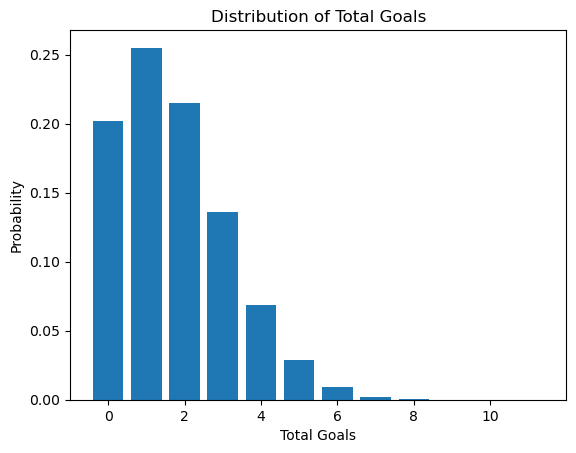

In [165]:
# Example usage
team_a_lambda = 1.832394
team_b_lambda = 0.695545
total_goals_prob, draw_prob, away_prob, local_prob = calculate_match_probabilities(team_a_lambda, team_b_lambda)

# Print the results
print("Total goals probabilities:")
for goals, prob in enumerate(total_goals_prob):
    print(f'Probability of total {goals} goals: {prob}')

print(f"Probability for draw: {draw_prob}")
print(f"Probability for away win: {away_prob}")
print(f"Probability for home win: {local_prob}")

import matplotlib.pyplot as plt
# Plot the distribution of possible total goals
plt.bar(range(len(total_goals_prob)), total_goals_prob)
plt.xlabel('Total Goals')
plt.ylabel('Probability')
plt.title('Distribution of Total Goals')
plt.show()